<a href="https://colab.research.google.com/github/metiyu/textmining/blob/main/Text_Mining_from_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Text Mining using **SVM** and **Random Forest** with **TF-IDF** and **Word2Vec** taken from **Web Scrapping news website** in Indonesia

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

### Web Scrapping
To collect news text data using the **web scrapping** method, we will use the websites **Liputan 6**, **CNN Indonesia**, and **Tempo**. On each website, **4 different categories** will be taken (meaning there are 4 different website pages) according to the category. The categories consist of **Politics**, **Sports**, **Business** and **Entertainment**. So to adjust the differences in each website, each **user-defined** function will be created.

Web scrapping will use the **Beutiful Soup** library. Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits on top of an HTML or XML parser, providing Python idioms for iterating, searching, and modifying the parsing tree.

In [2]:
# Example of web scrapping using Beautiful Soup
response = requests.get("https://www.liputan6.com")
# Retrieve website page and parse with html
soup = BeautifulSoup(response.content, 'html.parser')
# Need to retrieve the class of the desired html component, in this case the article class
articles = soup.select(".articles--iridescent-list article")
print(articles)

[<article class="articles--iridescent-list--item articles--iridescent-list--text-item" data-article-id="5588070" data-category="Infografis" data-channel="News" data-component-name="desktop:articles:iridescent-list:text-item" data-slug="infografis-timnas-indonesia-u-23-berburu-tiket-terakhir-olimpiade-paris-2024-harapan-dan-head-to-head-lawan-guinea" data-template-name="article-iridescent-list-text" data-template-var="container" data-title="Infografis Timnas Indonesia U-23 Berburu Tiket Terakhir Olimpiade Paris 2024, Harapan, dan Head to Head Lawan Guinea" data-type="TextTypeArticle" id="article_5588070"><figure class="articles--iridescent-list--text-item__figure-thumbnail"><a class="ui--a articles--iridescent-list--text-item__figure-thumbnail-link" data-kanal-page="news" data-template-var="url" href="https://www.liputan6.com/news/read/5588070/infografis-timnas-indonesia-u-23-berburu-tiket-terakhir-olimpiade-paris-2024-harapan-dan-head-to-head-lawan-guinea" title="Infografis Timnas Indo

On the Liputan 6 website, we started by adjusting the categories needed with those that could be accessed on the website:
- The **Politics** category can be accessed by adding the slug `news/politik`
- The **Sports** category can be accessed by adding the slug `bola/sports`
- The **Business** category can be accessed by adding the slug `bisnis`
- The **Entertainment** category can be accessed by adding the slug `showbiz`



In [3]:
def get_liputan_data(category):
  base_url = "https://www.liputan6.com"
  url = f"{base_url}/{category.lower()}"
  result = []
  label = ""
  if category == 'news/politik':
    label = 'politics'
  elif category == 'bola/sports':
    label = 'sports'
  elif category == 'bisnis':
    label = 'business'
  elif category == 'showbiz':
    label = 'entertainment'
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.select(".articles--iridescent-list article")
    for article in articles:
        title = article.get('data-title')
        if title != None:
          result.append({
              'text': title,
              'media': 'Liputan 6',
              'label': label
          })
        summary = article.select_one('.articles--iridescent-list--text-item__summary')
        if summary != None:
          result.append({
              'text': summary.text.strip(),
              'media': 'Liputan 6',
              'label': label
          })
  except Exception as error:
    print(error)
    result = {'error': error}
  return result

On the CNN Indonesia website, we started by adjusting the categories needed with those that can be accessed on the website:
- The **Politics** category can be accessed by adding the slug `nasional/politik`.
- The **Sports** category can be accessed by adding the slug `olahraga`
- The **Business** category can be accessed by adding the slug `ekonomi/bisnis`
- The **Entertainment** category can be accessed by adding the slug `hiburan`



In [4]:
def get_cnn_data(category):
  base_url = "https://www.cnnindonesia.com"
  url = f"{base_url}/{category.lower()}"
  result = []
  label = ""
  if category == 'nasional/politik':
    label = 'politics'
  elif category == 'olahraga':
    label = 'sports'
  elif category == 'ekonomi/bisnis':
    label = 'business'
  elif category == 'hiburan':
    label = 'entertainment'
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.select("div.nhl-list article.flex-grow")
    for article in articles:
      tagA = article.select_one('a.flex')
      if tagA and tagA.has_attr('dtr-ttl'):
          title = tagA['dtr-ttl'].strip()
          result.append({
              'text': title,
              'media': 'CNN Indonesia',
              'label': label
          })
  except Exception as error:
    print(error)
    result = {'error': error}
  return result

On the Tempo website, we started by adjusting the categories needed with those that can be accessed on the website:
(Note: there is a slug difference on the Tempo website because the category is located in front)
- The **Politics** category can be accessed at `https://nasional.tempo.co/politik`
- The **Sports** category can be accessed at `https://sports.tempo.co/`
- The **Business** category can be accessed at `https://bisnis.tempo.co/`
- The **Entertainment** category can be accessed at `https://www.tempo.co/tag/dunia-hiburan`



In [5]:
def get_tempo_data(url):
  url = f"{url}"
  result = []
  label = ""
  if url == 'https://nasional.tempo.co/politik':
    label = 'politics'
  elif url == 'https://sport.tempo.co/':
    label = 'sports'
  elif url == 'https://bisnis.tempo.co/':
    label = 'business'
  elif url == 'https://www.tempo.co/tag/dunia-hiburan':
    label = 'entertainment'
  try:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.select(".overflow .card-box")
    for article in articles:
      title = article.select_one('article h2.title a')
      if title != None:
        result.append({
            'text': title.text.strip(),
            'media': 'Tempo',
            'label': label
        })
      summary = article.select_one('article p')
      if summary != None:
        result.append({
            'text': summary.text.strip(),
            'media': 'Tempo',
            'label': label
        })
  except Exception as error:
    print(error)
    result = {'error': error}
  return result

Next, the web scrapping results from each website in the previous user-defined function will be stored in the `output` array. With a total of **721 data** containing **news headlines**, **news summary**, **category labels**, and **media sources**. In this case, news headlines from 3 website sources and news conclusions from 2 website sources (Liputan 6 and Tempo) are taken.

(Note: each time this web scrapping is run, it can produce a different amount of data depending on the number of news on each website on that day).

In [6]:
liputan6_category = ['news/politik', 'bola/sports', 'bisnis', 'showbiz']
cnn_category = ['nasional/politik', 'olahraga', 'ekonomi/bisnis', 'hiburan']
tempo_category = ['https://nasional.tempo.co/politik', 'https://sport.tempo.co/', 'https://bisnis.tempo.co/', 'https://www.tempo.co/tag/dunia-hiburan']

output = []
for c in liputan6_category:
  output += get_liputan_data(c)
for c in cnn_category:
  output += get_cnn_data(c)
for c in tempo_category:
  output += get_tempo_data(c)
print(len(output))

721


### Text Preprocessing
In NLP, the information to be extracted contains structurally inappropriate data. Therefore, it is necessary to convert it into structured data for further use (sentiment analysis, topic modelling, etc.).

In [7]:
import string
import re

In [8]:
# Convert text to lowercase
for o in output:
  o['clean_text'] = str.lower(o['text'])

In [9]:
# Deleting numbers
for o in output:
  o['clean_text'] = re.sub(r"\d+", "", o['clean_text'])

In [10]:
# Removing punctuation marks
# Note: if there is punctuation, it will be replaced with spaces, not deleted
translation_table = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
for o in output:
  o['clean_text'] = o['clean_text'].translate(translation_table)

In [11]:
# Removing whitespace (blank characters)
for o in output:
  o['clean_text'] = o['clean_text'].strip()

In [12]:
# Removing excess whitepace
for o in output:
  o['clean_text'] = re.sub("\s\s+" , " ", o['clean_text'])

In [13]:
# Deleting single character
for o in output:
  o['clean_text'] = re.sub(r"\b[a-zA-Z]\b", "", o['clean_text'])

### Stemming
Stemming is text processing in which words are trimmed to their basic form or **basic word**, referred to as "stem", by removing affixes and affixes. The purpose of stemming is to produce **consistent representations** of words that share the same root, thus facilitating text analysis by treating morphological variations of the words as the same form. The Sastrawi Library provides facilities to perform stemming in Indonesian using the `StemmerFactory`, which allows users to access customised Indonesian stemming algorithms.

In [14]:
# Stemming
%pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for o in output:
  o['clean_text'] = stemmer.stem(o['clean_text'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:00


### Filtering (Stopword Removal)
Filtering is text processing where **common words** that do not add value in content understanding, such as "and", "or", and "which", are **removed** from the text. This is done to improve the quality of text analysis by focusing on more meaningful words. In this case we use the **Sastrawi** library provides a tool that facilitates this process by using `StopWordRemoverFactory` which allows users to access a list of **Bahasa Indonesia** stopwords and remove them from the text easily.

In [15]:
# Filtering (Stopword Removal)
# To see the list of stopwords that have been defined in the Sastrawi library, you can use the following code
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [16]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
for o in output:
  o['clean_text'] = stopword.remove(o['clean_text'])

**It is also worth noting that here I run Stemming first before Stopword Removal to ensure the words from the dataset return to the base word first before running Stopword Removal.**

In [17]:
# Convert data to dataframe format
df = pd.DataFrame(output)
df.head()

,text,media,label,clean_text
0,PAN: Pembentukan Klub Presiden Akan Temui Bany...,Liputan 6,politics,pan bentuk klub presiden temu banyak hambat
1,Saleh menilai rencana wadah berkumpulnya para ...,Liputan 6,politics,saleh nilai rencana wadah kumpul presiden akan...
2,Melihat Dampak Politik dari Rencana Prabowo Me...,Liputan 6,politics,lihat dampak politik rencana prabowo bentuk pr...
3,Direktur Eksekutif Institute for Democracy & S...,Liputan 6,politics,direktur eksekutif institute for democracy str...
4,Gerindra: Jangan Adu Domba Relawan dan TKN Pra...,Liputan 6,politics,gerindra jangan adu domba rawan tkn prabowo gi...


### Save datasets
After the data has gone through the Text Preprocessing stage, the data will be saved in the form of `data.csv`. In this case I use Google Drive to save the `data.csv` (Note: to make it easier, you can use the session storage provided by Google Colab).

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df.to_csv('/content/drive/MyDrive/data.csv', index = False)

In [20]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

### Tokenizing
Tokenizing is the process of **separating text** into small units called tokens, such as words or phrases, for further analysis. It is an important step in text processing that enables more granular processing and understanding of text.

The **NLTK** library provides various Tokenizing methods, such as `RegexpTokenizer` which allows users to specify a pattern with regular expressions to separate text into tokens based on a specific pattern, in this case the regular expression pattern `\w+`. This pattern will separate text into tokens based on alphanumeric characters (letters and numbers), where each token will consist of one or more consecutive alphanumeric characters.

And `word_tokenize` which breaks text into tokens based on spaces and punctuation, useful for word tokenisation in languages that use spaces as standard separators.

This tokenizing is also done after the data is saved into `data.csv` because if it has been tokenised and saved into `csv` then the format will change to `string`, whereas the desired is `array`.

In [21]:
# Tokenizing
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
tokenizer = RegexpTokenizer(r'\w+')
df['token_text'] = df['clean_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
df.head()

,text,media,label,clean_text,token_text
0,PAN: Pembentukan Klub Presiden Akan Temui Bany...,Liputan 6,politics,pan bentuk klub presiden temu banyak hambat,"[pan, bentuk, klub, presiden, temu, banyak, ha..."
1,Saleh menilai rencana wadah berkumpulnya para ...,Liputan 6,politics,saleh nilai rencana wadah kumpul presiden akan...,"[saleh, nilai, rencana, wadah, kumpul, preside..."
2,Melihat Dampak Politik dari Rencana Prabowo Me...,Liputan 6,politics,lihat dampak politik rencana prabowo bentuk pr...,"[lihat, dampak, politik, rencana, prabowo, ben..."
3,Direktur Eksekutif Institute for Democracy & S...,Liputan 6,politics,direktur eksekutif institute for democracy str...,"[direktur, eksekutif, institute, for, democrac..."
4,Gerindra: Jangan Adu Domba Relawan dan TKN Pra...,Liputan 6,politics,gerindra jangan adu domba rawan tkn prabowo gi...,"[gerindra, jangan, adu, domba, rawan, tkn, pra..."


### Encoding Categorical Variable
From the data we processed, we know that the main task is the classification of words with classes in the `label` column, because `label` has the data type `string` and cannot be processed by the model later, it is necessary to do **Encoding**.

With the final result of encoding as printed below, where **Business** is represented with **0**, **Entertainment** is represented with **1**, and so on

In [23]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_encoded = Encoder.fit_transform(df["label"])
print("After encoding:")
for encoded_label, label in zip(np.unique(y_encoded), Encoder.inverse_transform(np.unique(y_encoded))):
    print(f"{encoded_label}: {label}")

After encoding:
0: business
1: entertainment
2: politics
3: sports


### Vectorizer
Vectorizers in the realm of **NLP** are essential tools for converting **text** into a numerical **vector representation** that can be understood by machine learning models. This process involves converting words into numerical form, such as using methods like **TF-IDF** (Term Frequency-Inverse Document Frequency) or Word Embeddings like **Word2Vec** or GloVe.

The result is a **vector matrix**, where each row represents the represented text, and each column represents the features present in it, allowing the NLP model to better understand and process the text.

Example as shown below

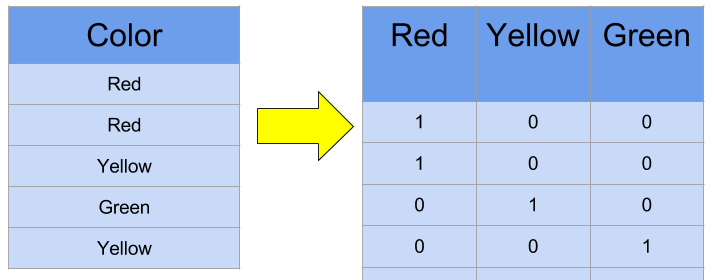

Where a word (colour in this case) will be converted into numbers, in application it will be converted into a matrix/vector.


> A method that provides information on how important a word is in a sample data or document in a dataset.

To fulfil the needs of the method requested above, **TF-IDF** will be used.

> The method of representing words into a set of vectors that describe their use in context, the vector size is 50, and the frequency of words that are taken into account is at least 3. The resulting vector must be based on training results with word input and target context output.

To fulfil the requirements of the method requested above, **Word2Vec** will be used.

### TF-IDF
The **TF-IDF** (Term Frequency-Inverse Document Frequency) method is a technique used in **NLP** to give **weight** to words in a document by considering **how often** the word appears in the document and **how common** the word is across the document collection.

Using **TF-IDF**, words that appear frequently in one document but rarely appear in another document will have a high weight, thus indicating their importance in a particular document.

For example, consider two documents:
- Document A with the text "**cats like to drink milk**"
- Document B with the text "**dogs like to play ball**".

The word "**cat**" will have a high TF-IDF in document A and low in document B, while the word "dog" will have the opposite. Thus, the TF-IDF method helps in **extracting relevant** information from the text by giving appropriate weights to the words appearing in the document.

**TF-IDF** will be performed using the **sklearn** library.
Method `TfidfVectorizer()` when applied to documents/corpus with function `.fit_transform()`, will produce a matrix of size `(len(df["clean_text"]), max_features)`. Above we set `max_feature = 1000`, to get the top 1000 terms with the largest term frequency.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit(df["clean_text"])

TfidfVectorizer(max_features=1000)

Once trained, the `transform` method is used to convert the text into **a TF-IDF** matrix. The result is a sparse matrix that shows the TF-IDF weight of each word in each document.

In [25]:
x_tfidf = tfidf_vect.transform(df["clean_text"])
print(x_tfidf)

  (0, 909)	0.41321006929200754
  (0, 677)	0.334257289931341
  (0, 586)	0.43337014195541296
  (0, 371)	0.4194051653335505
  (0, 91)	0.407442572859142
  (0, 79)	0.43337014195541296
  (1, 975)	0.27087579893483127
  (1, 876)	0.2556157144089162
  (1, 839)	0.2809960676638709
  (1, 732)	0.23117051131296876
  (1, 677)	0.18134495496206662
  (1, 556)	0.24421780694213752
  (1, 481)	0.5880867265860794
  (1, 409)	0.27087579893483127
  (1, 401)	0.2940433632930397
  (1, 73)	0.2556157144089162
  (1, 12)	0.2556157144089162
  (2, 732)	0.35961052489772516
  (2, 678)	0.3271897242966629
  (2, 671)	0.21073133398921276
  (2, 657)	0.3539633734371024
  (2, 437)	0.42137635844550986
  (2, 156)	0.43711952191859177
  (2, 146)	0.3271897242966629
  (2, 91)	0.34386736142464325
  :	:
  (716, 363)	0.2813848983398858
  (716, 350)	0.5494365991113813
  (716, 131)	0.28908092183309486
  (717, 631)	0.6392276989710746
  (717, 213)	0.5216465940462917
  (717, 105)	0.5650422814162216
  (718, 886)	0.2668013546879893
  (718, 562)	

### Word2Vec
The **Word2Vec** method is an approach in **NLP** used to generate **vector representations** of words based on the context in which they appear in a text. In Word2Vec, words that frequently co-occur or have similar contexts will have vector representations that are close to each other in vector space.

For example, in the sentence "**cats like to drink milk**", the words "**cats**" and "**milk**" will most likely have vector representations that are **close** to each other because they often appear in the same context. Similarly, words that have different contexts will have different vector representations.

By using the **Word2Vec** method, the model can understand the meaning of a word based on its **context in a text**.

For the implementation of **Word2Vec**, the **Gensim** library will be used. First of all, the Word2Vec model is initialised with parameters such as `vector_size` to specify the dimension of the word representation vector, `min_count` to specify the minimum number of word occurrences to be considered in model building, `epochs` to specify the number of learning iterations, and `workers` to specify the number of processes to be used during training, usually adjusted to the number of CPUs available.

In [26]:
import multiprocessing
from gensim.models import Word2Vec
word2vec_model = Word2Vec(
  vector_size=50,
  min_count=3,
  epochs=100,
  workers=multiprocessing.cpu_count()-1
)

Next, the vocabulary model is built by inserting tokens from the `token_text` column. Then, the model is trained by calling the `train` method using tokens from the same column. The total number of examples is calculated based on the number of tokens in `corpus_count` that have been collected during the previous vocabulary building process.

In [27]:
word2vec_model.build_vocab(
  df['token_text'].tolist()
)

In [28]:
word2vec_model.train(
  df['token_text'].tolist(),
  total_examples=word2vec_model.corpus_count,
  epochs=word2vec_model.epochs
)

(591461, 889700)

After the model is trained, the process of calculating **embedding** for each sentence in `df['token_text']` is performed. For each sentence, each token is iterated. If the token exists in the model vocabulary (`word2vec_model.wv`), then it is put into the `valid_tokens` list. Then, if there are valid tokens in the sentence, the average of the representation vectors of the valid words is calculated using numpy, and the result is inserted into the `x_word2vec` list containing the **embedding** for each sentence.

In this way, the code generates a **representation vector** for each sentence in the DataFrame `df['token_text']` using the trained **Word2Vec** model.

In [29]:
x_word2vec = []

i = 0
for sentence in df['token_text']:
  sentence_embedding = []
  valid_tokens = []
  for token in sentence:
    if token in word2vec_model.wv:
      valid_tokens.append(token)
  if valid_tokens:
    sentence_embedding = np.mean([word2vec_model.wv[token] for token in valid_tokens], axis=0)
    x_word2vec.append(sentence_embedding)
  else:
    print(token)
    print(sentence)
    print(i)
  i+=1

### SVM & RFC w/ TF-IDF
Now we start to perform text classification using **SVM** and **Random Forest** with a vectoriser of **TF-IDF**. As with any machine learning model, we will start by creating training and testing data, in this case we use `train_test_split` with a ratio of **70:30 = train:test**.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [31]:
tfidf_train_X, tfidf_test_X, tfidf_train_Y, tfidf_test_Y = train_test_split(x_tfidf,y_encoded,test_size=0.3)

In [32]:
tfidf_svm_model = svm.SVC()
tfidf_svm_model.fit(tfidf_train_X,tfidf_train_Y)
tfidf_svm_predictions = tfidf_svm_model.predict(tfidf_test_X)
print("SVM Accuracy Score: ", accuracy_score(tfidf_svm_predictions, tfidf_test_Y)*100)

SVM Accuracy Score:  83.41013824884793


In [33]:
tfidf_rfc_model = RandomForestClassifier()
tfidf_rfc_model.fit(tfidf_train_X,tfidf_train_Y)
tfidf_rfc_predictions = tfidf_rfc_model.predict(tfidf_test_X)
print("RFC Accuracy Score: ",accuracy_score(tfidf_rfc_predictions, tfidf_test_Y)*100)

RFC Accuracy Score:  81.5668202764977


Next we will do hyperparameter tuning for the **SVM** and **Random Forest** models. We will also see if the **accuracy** after this stage **remains the same**/**higher**/**lower** and look at the **parameters** used.

In [34]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],                   # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel type
    'gamma': ['scale', 'auto'],                     # Kernel coefficient
    'degree': [2, 3, 4]                             # Polynomial degree (only for 'poly' kernel)
}

tfidf_grid_svm = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
tfidf_grid_svm.fit(tfidf_train_X,tfidf_train_Y)

print("Best Parameters:", tfidf_grid_svm.best_params_)
print("Current Parameters:", tfidf_grid_svm.best_estimator_.get_params())

Best Parameters: {'C': 1000, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Current Parameters: {'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [35]:
tfidf_grid_svm_predictions = tfidf_grid_svm.predict(tfidf_test_X)
print("SVM Accuracy Score (After Parameter Tuning): ", accuracy_score(tfidf_grid_svm_predictions, tfidf_test_Y)*100)

SVM Accuracy Score (After Parameter Tuning):  88.47926267281106


In [36]:
param_grid = {
    'n_estimators' : [90, 100, 115, 130],   # Number of decision trees
    'criterion': ['gini', 'entropy'],       # Splitting criteria
    'max_features': ['log2', 'sqrt', None]  # Number of features to consider
}

tfidf_grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
tfidf_grid_rfc.fit(tfidf_train_X, tfidf_train_Y)

print("Best Parameters:", tfidf_grid_rfc.best_params_)
print("Current Parameters:", tfidf_grid_rfc.best_estimator_.get_params())

Best Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 130}
Current Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [37]:
tfidf_grid_rfc_predictions = tfidf_grid_rfc.predict(tfidf_test_X)
print("RFC Accuracy Score (After Parameter Tuning): ", accuracy_score(tfidf_grid_rfc_predictions, tfidf_test_Y)*100)

RFC Accuracy Score (After Parameter Tuning):  84.7926267281106


### SVM & RFC w/ Word2Vec
Now we start to perform text classification using **SVM** and **Random Forest** with the vectoriser from **Word2Vec**. As before, we will start by creating training and testing data, in this case we use `train_test_split` with a ratio of **70:30 = train:test**.

In [38]:
word2vec_train_X, word2vec_test_X, word2vec_train_Y, word2vec_test_Y = train_test_split(x_word2vec,y_encoded,test_size=0.3)

In [39]:
word2vec_svm_model = svm.SVC()
word2vec_svm_model.fit(word2vec_train_X,word2vec_train_Y)
word2vec_svm_predictions = word2vec_svm_model.predict(word2vec_test_X)
print("SVM Accuracy Score: ", accuracy_score(word2vec_svm_predictions, word2vec_test_Y)*100)

SVM Accuracy Score:  84.7926267281106


In [40]:
word2vec_rfc_model = RandomForestClassifier()
word2vec_rfc_model.fit(word2vec_train_X,word2vec_train_Y)
word2vec_rfc_predictions = word2vec_rfc_model.predict(word2vec_test_X)
print("RFC Accuracy Score: ",accuracy_score(word2vec_rfc_predictions, word2vec_test_Y)*100)

RFC Accuracy Score:  87.55760368663594


Next we will perform hyperparameter tuning for both models. We will also see if the **accuracy** after this stage **remains the same**/**higher**/**lower** and look at the **parameters** used.

In [41]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],                   # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel type
    'gamma': ['scale', 'auto'],                     # Kernel coefficient
    'degree': [2, 3, 4]                             # Polynomial degree (only for 'poly' kernel)
}

word2vec_grid_svm = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
word2vec_grid_svm.fit(word2vec_train_X,word2vec_train_Y)

print("Best Parameters:", word2vec_grid_svm.best_params_)
print("Current Parameters:", word2vec_grid_svm.best_estimator_.get_params())

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Current Parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [42]:
word2vec_grid_svm_predictions = word2vec_grid_svm.predict(word2vec_test_X)
print("SVM Accuracy Score (After Parameter Tuning): ", accuracy_score(word2vec_grid_svm_predictions, word2vec_test_Y)*100)

SVM Accuracy Score (After Parameter Tuning):  86.63594470046083


In [43]:
param_grid = {
    'n_estimators' : [90, 100, 115, 130],   # Number of decision trees
    'criterion': ['gini', 'entropy'],       # Splitting criteria
    'max_features': ['log2', 'sqrt', None]  # Number of features to consider
}

word2vec_grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
word2vec_grid_rfc.fit(word2vec_train_X,word2vec_train_Y)

print("Best Parameters:", word2vec_grid_rfc.best_params_)
print("Current Parameters:", word2vec_grid_rfc.best_estimator_.get_params())

Best Parameters: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
Current Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [44]:
word2vec_grid_rfc_predictions = word2vec_grid_rfc.predict(word2vec_test_X)
print("RFC Accuracy Score (After Parameter Tuning): ", accuracy_score(word2vec_grid_rfc_predictions, word2vec_test_Y)*100)

RFC Accuracy Score (After Parameter Tuning):  88.47926267281106


### Model Comparison
After all the models have been trained and predictions made, it is time to compare the performance of each model with each vectorizer to find which model is the most suitable for this dataset.

We start by calculating **the number of each label** to consider what average **score** to take since we are performing a **multiclass classification**.

If the dataset has **class imbalance**, then *Weighted Average* can provide a more **representative evaluation** of the model performance across all classes. However, if we want to prioritise each class **evenly**, regardless of its frequency, then *Macro Average* may be more appropriate.

In [48]:
business_count = df['label'].value_counts()['business']
entertainment_count = df['label'].value_counts()['entertainment']
sports_count = df['label'].value_counts()['sports']
politics_count = df['label'].value_counts()['politics']

print("Business data counter: ", business_count)
print("Entertainment data counter: ", entertainment_count)
print("Sports data counter: ", sports_count)
print("Politics data counter: ", politics_count)

Business data counter:  196
Entertainment data counter:  150
Sports data counter:  195
Politics data counter:  180


Since the number of labels is not too far apart, *Macro Average* will be used as an assessment for **Precision**, **Recall**, and **F1-Score**. (Note: this part can be adjusted according to the web scrapping results at the beginning, because each code run can produce a lot of different data)

In [47]:
data = {
    "Text Representation": [
        "TF-IDF",
        "TF-IDF",
        "Word2Vec",
        "Word2Vec"],
    "Machine Learning Algorithm": [
        "SVM",
        "Random Forest",
        "SVM",
        "Random Forest"],
    "Machine Learning Parameter": [
        tfidf_grid_svm.get_params(),
        tfidf_grid_rfc.get_params(),
        word2vec_svm_model.get_params(),
        word2vec_rfc_model.get_params()],
    "Accuracy": [
        accuracy_score(tfidf_test_Y, tfidf_grid_svm_predictions) * 100,
        accuracy_score(tfidf_test_Y, tfidf_grid_rfc_predictions) * 100,
        accuracy_score(word2vec_test_Y, word2vec_grid_svm_predictions) * 100,
        accuracy_score(word2vec_test_Y, word2vec_grid_rfc_predictions) * 100],
    "Precision": [
        precision_score(tfidf_test_Y, tfidf_grid_svm_predictions, average='macro') * 100,
        precision_score(tfidf_test_Y, tfidf_grid_rfc_predictions, average='macro') * 100,
        precision_score(word2vec_test_Y, word2vec_grid_svm_predictions, average='macro') * 100,
        precision_score(word2vec_test_Y, word2vec_grid_rfc_predictions, average='macro') * 100],
    "Recall": [
        recall_score(tfidf_test_Y, tfidf_grid_svm_predictions, average='macro') * 100,
        recall_score(tfidf_test_Y, tfidf_grid_rfc_predictions, average='macro') * 100,
        recall_score(word2vec_test_Y, word2vec_grid_svm_predictions, average='macro') * 100,
        recall_score(word2vec_test_Y, word2vec_grid_rfc_predictions, average='macro') * 100],
    "F1-Score": [
        f1_score(tfidf_test_Y, tfidf_grid_svm_predictions, average='macro') * 100,
        f1_score(tfidf_test_Y, tfidf_grid_rfc_predictions, average='macro') * 100,
        f1_score(word2vec_test_Y, word2vec_grid_svm_predictions, average='macro') * 100,
        f1_score(word2vec_test_Y, word2vec_grid_rfc_predictions, average='macro') * 100],
}

report = pd.DataFrame(data)
report

,Text Representation,Machine Learning Algorithm,Machine Learning Parameter,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,SVM,"{'cv': 5, 'error_score': nan, 'estimator__C': ...",88.479263,89.467935,89.272133,88.442591
1,TF-IDF,Random Forest,"{'cv': 5, 'error_score': nan, 'estimator__boot...",84.792627,85.643988,85.457516,84.418769
2,Word2Vec,SVM,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",86.635945,86.490165,86.835953,86.277243
3,Word2Vec,Random Forest,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",88.479263,88.119518,88.545354,88.140833


### Conclusion
1. **TF-IDF vs. Word2Vec Representation**:
   - TF-IDF representation achieved slightly higher accuracy for both SVM and Random Forest compared to Word2Vec.
   - However, the differences in accuracy are not substantial, indicating that both representations perform reasonably well.

2. **SVM vs. Random Forest**:
   - For both TF-IDF and Word2Vec representations, SVM consistently outperformed Random Forest in terms of accuracy, precision, recall, and F1-score.
   - SVM achieved higher scores across all metrics for both TF-IDF and Word2Vec representations.

3. **Parameter Tuning**:
   - The machine learning parameters provided for both SVM and Random Forest models were effective in achieving good performance, as evidenced by high accuracy, precision, recall, and F1-score values.

4. **Overall Performance**:
   - TF-IDF representation combined with SVM and Word2Vec representation combined with Random Forest, resulted in equally good performance among all combinations, with the highest accuracy of 88.48%.

In summary, based on the provided results, using SVM with TF-IDF representation and Random Forest with Word2Vec representation appears to be the most effective approach for the given task, achieving the highest accuracy among the evaluated combinations.